<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/prueba_2/Prueba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prueba 2
Ivan Ulloa

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import io
from google.colab import files
import plotly.express as px
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter

In [71]:
def prueba_corridas(x, a=0.05):
  media = 0.5
  secuencia = []

  secuencia = [1 if i>=media else 0 for i in x]
  n0 = int(secuencia.count(0))
  n1 = int(secuencia.count(1))
  Co = int((np.diff(secuencia)!=0).sum())+1
  n = n0+n1

  uCo = ((2*n0*n1)/n)+(1/2)
  o2Co = ((2*n0*n1)*((2*n0*n1)-n))/((n**2)*(n-1))
  z0 = (Co-uCo)/(np.sqrt(o2Co))

  if -1.96 < z0 < 1.96:
    print(f'Hipótesis Aceptada. Z0 = {z0} C0 = {Co} n0 = {n0} n1 = {n1}')
  else:
    print(f'Hipótesis Rechazada. Z0 = {z0} C0 = {Co} n0 = {n0} n1 = {n1}')

  plt.xlabel("0 -1")
  plt.ylabel("Cantidad")
  plt.bar([0,1], [n0, n1])
  plt.show()

Cuadrados Medios

Hipótesis Aceptada. Z0 = 0.02493838832056819 C0 = 49 n0 = 41 n1 = 59


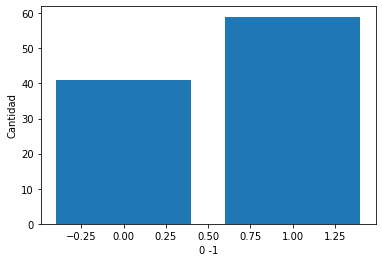

In [80]:
def random_middle_square(seed, d, N=100):
    xn = seed
    numeros=[]
    
    for i in range(N):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-d/2):int(tam/2+d/2)])
        rn = ui / (int('9'*d)+1)
        numeros.append(rn)
        
        xn = ui

    return numeros

seed = 74731897457
d = 7

x = random_middle_square(seed, d, 100)
prueba_corridas(x)

Concurrencias Lineales

Hipótesis Aceptada. Z0 = -0.9750491625213825 C0 = 45 n0 = 44 n1 = 56


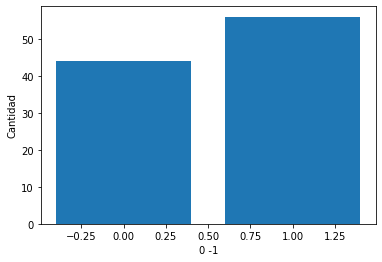

In [81]:
def congruencia_lineal(a, b, seed, m, N=100):
    xn = seed
    numeros=[]

    for i in range(N):
        xnn = (a*xn+b) % m
        ui = xnn/m
        
        numeros.append(ui)
        xn = xnn
    return numeros

a = 74731897457
b = 37747318974
x0 = 7
m = 19

x = congruencia_lineal(74731897457, 37747318974, x0, m, 100)
prueba_corridas(x)

Python Random

Hipótesis Aceptada. Z0 = -0.7218758774415761 C0 = 46 n0 = 57 n1 = 43


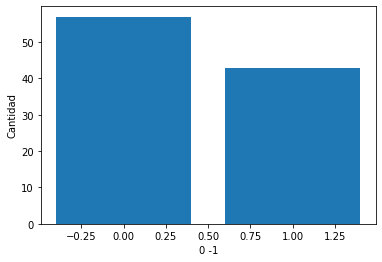

In [ ]:
def random_python(N=100):
  numeros = []
  random.seed(1032022)
  [numeros.append(random.random())for i in range(N)]
  return numeros

x= random_python()
prueba_corridas(x)

Tausworthe

[1, 1, 1, 1, 1]
Hipótesis Aceptada. Z0 = -0.48937066964888626 C0 = 12 n0 = 15 n1 = 11


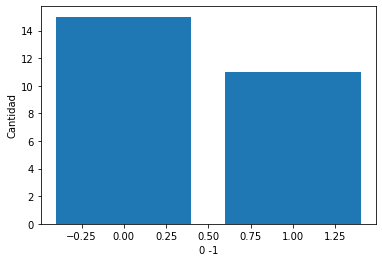

In [83]:
def lfsr_custom(seed, r, q):
    A = seed
    start = q
    end = (2**q)

    for i in range(start, end):
        pr = i-r
        pq = i-q
        A.append(A[pr]^A[pq])

    return A

def to_decimal(result, l):
    B = []
    jump = l
    end = len(result)
    const = 2**l

    for i in range(0, end, l):
        dec = ''.join(map(str, result[i:jump]))
        B.append(int(dec,2)/const)
        
        jump = jump + l

    return B

q = 7
r = 3
l = 5

seed = [1 for i in range(l)]
print(seed)
result=lfsr_custom(seed, r, q)
x = to_decimal(result, l)
prueba_corridas(x)